In [122]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
%matplotlib inline

In [124]:
customers = pd.read_csv("ecommerce_customers.csv")

In [125]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [126]:
# baraye in asami columns hhara taghir midahim ke ham ba video amoozeshi yeki bashad ham _ gozari beyne asami bejaye space
customers.columns = ['Email', 'Address', 'membership_image', 'mean_session_length', 'time_spent_app', 'time_spent_website', 'length_of_membership','annual_amount_spend']

In [127]:
customers.describe()

,mean_session_length,time_spent_app,time_spent_website,length_of_membership,annual_amount_spend
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [25]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   membership_image      500 non-null    object 
 3   mean_session_lengh    500 non-null    float64
 4   time_spent_app        500 non-null    float64
 5   time_spent_website    500 non-null    float64
 6   lenght_of_membership  500 non-null    float64
 7   annual_amount_spend   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


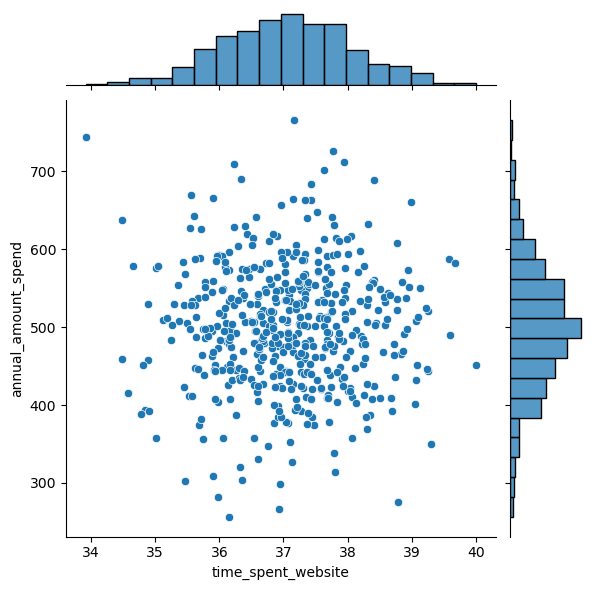

In [128]:
# namayeshe vabastegie byne 2 meghdare x, y 
sns.jointplot(data=customers, x='time_spent_website', y='annual_amount_spend')

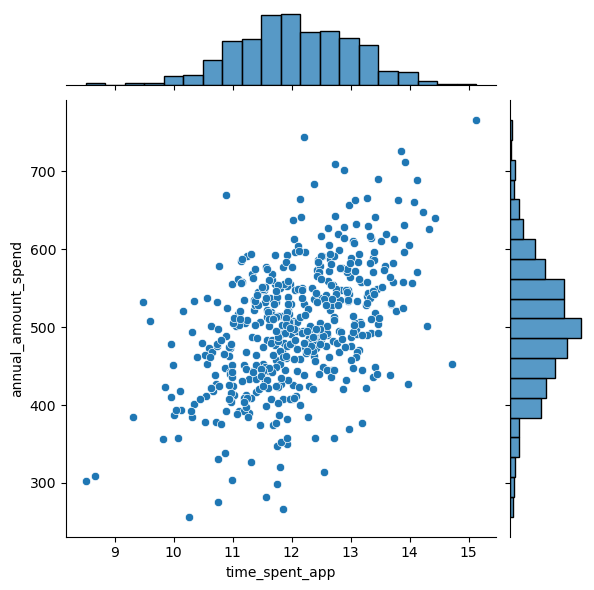

In [129]:
sns.jointplot(data=customers, x='time_spent_app', y='annual_amount_spend')

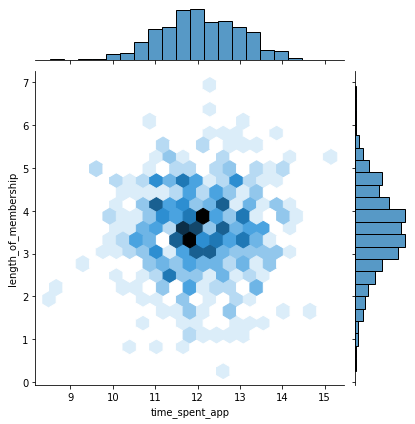

In [45]:
sns.jointplot(data = customers, x = 'time_spent_app', y = 'length_of_membership', kind='hex')

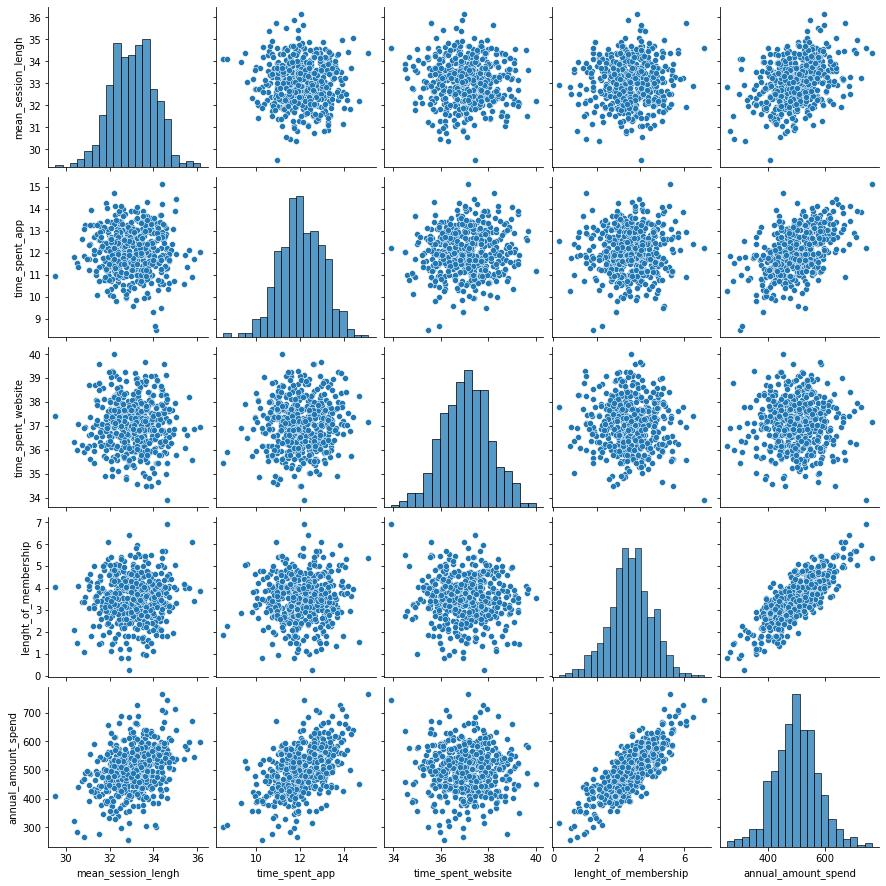

In [30]:
sns.pairplot(customers)

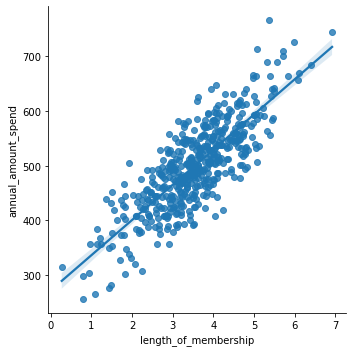

In [46]:
sns.lmplot(data = customers, x = 'length_of_membership', y ='annual_amount_spend')

In [47]:
# train kardane dade ha 
customers.columns

Index(['Email', 'Address', 'membership_image', 'mean_session_length',
       'time_spent_app', 'time_spent_website', 'length_of_membership',
       'annual_amount_spend'],
      dtype='object')

In [7]:
X =customers [['mean_session_length', 'time_spent_app', 'time_spent_website', 'length_of_membership']]

In [8]:
y = customers['annual_amount_spend']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) 

In [53]:
# fit kardane model 
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [55]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [57]:
#predict kardane dade ha
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Values')

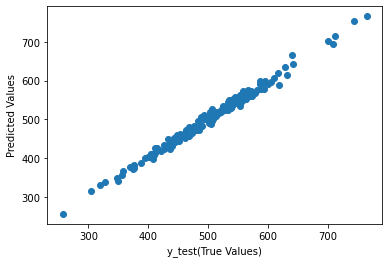

In [59]:
# namayeshe maghadire predict shode va True values dar yek plot
plt.scatter(y_test, predictions)
plt.xlabel('y_test(True Values)')
plt.ylabel('Predicted Values')

In [60]:
from sklearn import metrics

In [61]:
# namayeshe 3 meghdare mohasebatie asli model
print("MAE", metrics.mean_absolute_error(y_test, predictions))
print("MSE", metrics.mean_squared_error(y_test, predictions))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 7.228148653430817
MSE 79.81305165097412
RMSE 8.933815066978616


In [62]:
# mohasebeye variance model
metrics.explained_variance_score(y_test, predictions)

0.9890771231889607

C:\Users\Nima\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


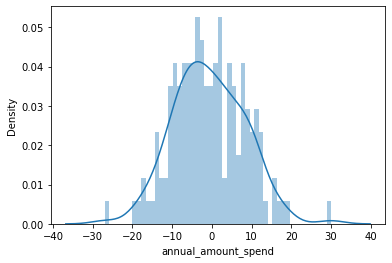

In [64]:
#baraye mohsasebeye baghimande ekhtelaf meghdare predict shode va True value 
sns.distplot((y_test - predictions), bins = 50);

In [67]:
# namayeshe tasirgozarie 4 field zir be annual_spend ke neshan midahad application daramad saz tar boode ta wbsite 
cdf = pd.DataFrame(lm.coef_,X.columns, columns=['Coeff'])
cdf

,Coeff
mean_session_length,25.981550
time_spent_app,38.590159
time_spent_website,0.190405
length_of_membership,61.279097


In [2]:
# GREAT JOB ;)

In [10]:
import torch
from torch import nn

In [12]:
X_train = torch.tensor(X_train.values).type(torch.float32)
X_test = torch.tensor(X_test.values).type(torch.float32)
y_train = torch.tensor(y_train.values).type(torch.float32)
y_test = torch.tensor(y_test.values).type(torch.float32)

In [52]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(4, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
#         x = nn.functional.relu(self.fc2(nn.functional.relu(self.fc1(x))))
        x = self.fc2(x)
        return x

In [53]:
model_0 = Net()
model_0

Net(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)

In [54]:
loss_fn = nn.MSELoss()

optimizer = torch.optim.Adam(params=model_0.parameters(), lr=1000)

In [55]:
torch.manual_seed(101)
epochs = 1000

for epoch in range(epochs):
    
    X_train_preds = model_0(X_train)
    loss = loss_fn(X_train_preds, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_0.eval()
    with torch.no_grad():
        y_preds = model_0(X_test)
        test_loss = loss_fn(y_preds, y_test)
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | loss:{loss} | test_loss: {test_loss}")

Epoch: 0 | loss:259805.640625 | test_loss: 256735.140625
Epoch: 100 | loss:5856.98876953125 | test_loss: 7258.84033203125
Epoch: 200 | loss:5856.86181640625 | test_loss: 7262.6083984375
Epoch: 300 | loss:5856.861328125 | test_loss: 7262.6630859375
Epoch: 400 | loss:5856.86181640625 | test_loss: 7262.6630859375
Epoch: 500 | loss:5856.861328125 | test_loss: 7262.6630859375
Epoch: 600 | loss:5856.86181640625 | test_loss: 7262.6630859375
Epoch: 700 | loss:5856.86181640625 | test_loss: 7262.6630859375
Epoch: 800 | loss:5856.86181640625 | test_loss: 7262.6630859375
Epoch: 900 | loss:5856.86181640625 | test_loss: 7262.6630859375


In [107]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters / also called: linear transform, probing layer, fully connected layer, dense layer
        self.layer1 = nn.Linear(1, 10)
        self.layer2 = nn.Linear(10, 10)
        self.layer3 = nn.Linear(10, 1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer3(self.layer2(self.layer1(x)))

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1

LinearRegressionModelV2(
  (layer1): Linear(in_features=1, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [114]:
loss_fn = nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer = torch.optim.Adam(params=model_1.parameters(), 
                            lr=0.01,
                            weight_decay=0.01)

In [119]:
torch.manual_seed(101)
epochs = 1000
for epoch in range(epochs):
    model_1.train()

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, y_test)

      # Print out what's happening
    if epoch % 100 == 0: 
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.03629192337393761 | Test loss: 7.631287097930908
Epoch: 100 | Loss: 0.08825331181287766 | Test loss: 0.4661156237125397
Epoch: 200 | Loss: 0.18011175096035004 | Test loss: 0.6996384263038635
Epoch: 300 | Loss: 0.2602778971195221 | Test loss: 0.8499806523323059
Epoch: 400 | Loss: 0.22214069962501526 | Test loss: 0.03187587112188339
Epoch: 500 | Loss: 0.40715867280960083 | Test loss: 0.8572092652320862
Epoch: 600 | Loss: 0.22986918687820435 | Test loss: 0.28231796622276306
Epoch: 700 | Loss: 0.08768484741449356 | Test loss: 0.12304431200027466
Epoch: 800 | Loss: 0.02758251503109932 | Test loss: 0.15109854936599731
Epoch: 900 | Loss: 0.2690388262271881 | Test loss: 0.1560288965702057


In [117]:
weight = 0.7
bias = 0.3

# Create
start = 0
end = 100
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias 

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [118]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:] 

len(X_train), len(y_train), len(X_test), len(y_test)

(4000, 4000, 1000, 1000)

In [133]:
# start

In [134]:
data = customers

In [143]:
data = data.drop(["Email", "Address", "membership_image"], axis=1)
data

,mean_session_length,time_spent_app,time_spent_website,length_of_membership,annual_amount_spend
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [140]:
input_data = data.drop('annual_amount_spend', axis=1)
input_data

,mean_session_length,time_spent_app,time_spent_website,length_of_membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [144]:
output_data = data['annual_amount_spend']

In [146]:
import torch
from torch import nn

In [148]:
input_data = torch.tensor(input_data.values).type(torch.float32)
output_data = torch.tensor(output_data).type(torch.float32)

In [155]:
output_data = output_data.unsqueeze(dim=1)

In [198]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(4, 16)
        self.layer2 = nn.Linear(16, 16)
        self.layer3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))
        return x

In [206]:
model = LinearRegression()

In [226]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

In [223]:
epochs = 5000
for epoch in range(epochs):
    X_preds = model(input_data)
    loss = loss_fn(output_data, X_preds)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss}")

Epoch: 0 | Loss: 7.840175628662109
Epoch: 100 | Loss: 7.8518805503845215
Epoch: 200 | Loss: 7.84794282913208
Epoch: 300 | Loss: 7.849160194396973
Epoch: 400 | Loss: 7.871676921844482
Epoch: 500 | Loss: 7.865917205810547
Epoch: 600 | Loss: 7.8717570304870605
Epoch: 700 | Loss: 7.849132537841797
Epoch: 800 | Loss: 7.883460998535156
Epoch: 900 | Loss: 7.8473639488220215
Epoch: 1000 | Loss: 8.106114387512207
Epoch: 1100 | Loss: 7.899360179901123
Epoch: 1200 | Loss: 7.852465629577637
Epoch: 1300 | Loss: 7.920423984527588
Epoch: 1400 | Loss: 7.953682899475098
Epoch: 1500 | Loss: 7.852514743804932
Epoch: 1600 | Loss: 7.860836982727051
Epoch: 1700 | Loss: 7.860262870788574
Epoch: 1800 | Loss: 7.849274158477783
Epoch: 1900 | Loss: 7.858129024505615
Epoch: 2000 | Loss: 7.985202312469482
Epoch: 2100 | Loss: 7.850106239318848
Epoch: 2200 | Loss: 7.840880393981934
Epoch: 2300 | Loss: 7.954373359680176
Epoch: 2400 | Loss: 7.928619861602783
Epoch: 2500 | Loss: 7.841448783874512
Epoch: 2600 | Loss: 7.

In [227]:
preds = model(input_data[:5])
preds

tensor([[595.5201],
        [380.4384],
        [505.1881],
        [570.7843],
        [591.7838]], grad_fn=<AddmmBackward0>)

In [228]:
output_data[:5]

tensor([[587.9510],
        [392.2049],
        [487.5475],
        [581.8524],
        [599.4061]])